# Analysis of Bitcoin and Binancecoin

Diversification of assets is an important part of successful investment management. One way to measure diversification is by the correlation of assets within the portfolio.  Assets that are correlated do not offer protection in the event that one loses value. It is beneficial to know whether assets are correlated to be able to sufficiently hedge against such losses. 

The purpose of this project was to experiment with this concept in the cryptocurrency market and quantify the correlation between two major currencies, Bitcoin (BTC) and Binancecoin (BNB). Additionally, it tested the feasibility of predictive modeling with machine learning in a highly volatile market. It was intended purely for experimentation and not as an investment strategy or advice.  

The dataset was obtained from Usama Buttar on Kaggle at the following url:  
https://www.kaggle.com/datasets/usamabuttar/cryptocurrency-historical-prices-updated-daily  

In [1]:
# import libraries
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
os.getcwd()

'c:\\Users\\mwate\\Python'

#### Obtaining and cleaning the BNB data

In [2]:
# create new DataFrame object with Binancecoin data
df_BNB = pd.read_csv('BNB_BNB.csv')
df_BNB.shape 

(1991, 7)

In [3]:
# preview first 5 entries
df_BNB.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
1,2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2,2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
3,2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
4,2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [4]:
# create new columns for BNB average price and daily change
df_BNB['avg_price'] = (df_BNB['High'] + df_BNB['Low']) / 2 
df_BNB['change'] = (df_BNB['Close'] - df_BNB['Open'])
df_BNB # preview DataFrame

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
0,2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200,2.034085,-0.062370
1,2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000,1.857125,-0.210890
2,2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150,1.766020,-0.115810
3,2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700,1.567680,-0.149200
4,2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800,1.626310,0.160610
...,...,...,...,...,...,...,...,...,...
1986,2023-04-18,340.044769,346.493042,337.859314,343.193451,343.193451,741280408,342.176178,3.148682
1987,2023-04-19,343.169617,343.529907,321.052032,322.707520,322.707520,826810466,332.290970,-20.462097
1988,2023-04-20,322.587738,326.552521,315.902191,317.889923,317.889923,663981561,321.227356,-4.697815
1989,2023-04-21,317.921112,331.417175,316.116943,321.674988,321.674988,1057530805,323.767059,3.753876


In [5]:
# check for odd datatypes
df_BNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1991 non-null   object 
 1   Open       1991 non-null   float64
 2   High       1991 non-null   float64
 3   Low        1991 non-null   float64
 4   Close      1991 non-null   float64
 5   Adj Close  1991 non-null   float64
 6   Volume     1991 non-null   int64  
 7   avg_price  1991 non-null   float64
 8   change     1991 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 140.1+ KB


In [6]:
# convert date datatype from object to pd DateTime
df_BNB['Date'] = pd.to_datetime(df_BNB['Date'], format='%Y-%m-%d')

#### Obtaining and cleaning the BTC data

In [7]:
# get bitcoin data
df_BTC = pd.read_csv('BTC_Bitcoin.csv')

In [8]:
# define two new columns with the average daily price and daily change
df_BTC['avg_price'] = (df_BTC['High'] + df_BTC['Low']) / 2
df_BTC['change'] = (df_BTC['Close'] - df_BTC['Open'])
df_BTC.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,460.298004,-8.529999
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,434.981995,-32.419983
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,406.183502,-29.307007
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,406.589493,14.230988
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,402.803497,-9.263977
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,402.022995,3.052002
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,418.876999,33.698975
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,428.621994,-12.546021
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,416.493988,-11.582001
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800,407.473495,-7.003998


In [9]:
# preview the last entries of BTC DataFrame
df_BTC.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330,27763.666992,-972.320312
3139,2023-04-22,27274.150391,27385.095703,27175.154297,27338.378906,27338.378906,19185252352,27280.125000,64.228516


In [10]:
# check for odd datatypes
df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3140 non-null   object 
 1   Open       3140 non-null   float64
 2   High       3140 non-null   float64
 3   Low        3140 non-null   float64
 4   Close      3140 non-null   float64
 5   Adj Close  3140 non-null   float64
 6   Volume     3140 non-null   int64  
 7   avg_price  3140 non-null   float64
 8   change     3140 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 220.9+ KB


In [11]:
# replace 'Date' column object with datetime format
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'], format='%Y-%m-%d')

#### Visualizing relative prices  

As a first step, the prices of BTC and BNB from 2017 on were displayed. Because the price of BTC is multiple orders of magnitude greater then the price of BNB, their prices were normalized in order to conveniently view them relative to each other on the same graph.

In [12]:
# normalization
def norm(x, x_max, x_min): # define min/max normalizing function
    x_norm = ((x - x_min)/(x_max - x_min))*100
    return x_norm

In [13]:
# add columns of normalized average price to bitcoin
df_BTC['norm_price'] = df_BTC['avg_price'].apply(lambda x: norm(x, df_BTC['avg_price'].max(), df_BTC['avg_price'].min()))

In [14]:
# add columns of normalized average price to binancecoin
df_BNB['norm_price'] = df_BNB['avg_price'].apply(lambda x: norm(x, df_BNB['avg_price'].max(), df_BNB['avg_price'].min()))

In [15]:
# replace default index with date
df_BNB.index = df_BNB['Date']

Removing all the rows from BTC values that correspond to dates before BNB existed.

In [16]:
# Create new DataFrame with only the prices of bitcoin from after November 9 2017
BTC = df_BTC.loc[(df_BTC['Date'] >= '2017-11-09')]
BTC

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
1149,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,7274.175049,-303.250000,10.521307
1150,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,6874.435059,-555.589844,9.926973
1151,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,6538.685059,-261.009766,9.427780
1152,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,6072.029785,-345.380371,8.733956
1153,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,6327.739990,621.240234,9.114147
...,...,...,...,...,...,...,...,...,...,...
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938,44.031424
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812,43.626866
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312,42.164378
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330,27763.666992,-972.320312,40.985104


In [17]:
# replace default index with date
BTC.index = BTC['Date']

#### Results
Plotting the normalized average daily prices on a line graph to visualize them relative to each other.

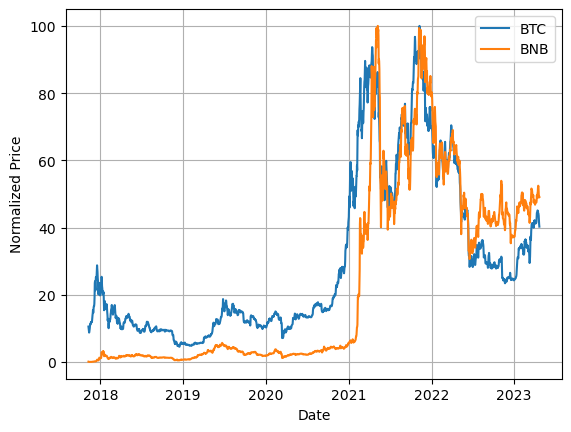

In [18]:
# create plot 
plt.figure()
sns.lineplot(BTC['norm_price'], label='BTC')
sns.lineplot(df_BNB['norm_price'], label='BNB')
plt.ylabel("Normalized Price")
plt.grid()
plt.legend()
plt.show()

This shows the relative prices of both coins from November 2017 to March 2023. It is clear that there is some level of correlation between the two. Some features to note are the spike of BNB after BTC in early 2021, and from mid 2022 BNB retained more of its previous value than BTC did.

#### Setting up the correlation calculation

A new DataFrame was created with just the information about daily price changes and average prices. The ```.corr()``` method was called to determine correlation.

In [19]:
# create the new DataFrame
price_changes = BTC[['change']].copy() # create new df
price_changes['BNB_change'] = df_BNB['change'].copy() # add column to new df
price_changes.rename(columns={'change': 'BTC_change'}, inplace=True) # rename column
price_changes['BTC_price'] = BTC[['avg_price']].copy()
price_changes['BNB_price'] = df_BNB[['avg_price']].copy()
price_changes.index = BTC['Date'] # change the index to the date

Checking for any null entries.

In [20]:
# compute sum of null entries in either column
print(price_changes['BNB_change'].isna().sum(),',', price_changes['BTC_change'].isna().sum())

0 , 0


In [21]:
# display preview of new df
price_changes

,BTC_change,BNB_change,BTC_price,BNB_price
Date,,,,
2017-11-09,-303.250000,-0.062370,7274.175049,2.034085
2017-11-10,-555.589844,-0.210890,6874.435059,1.857125
2017-11-11,-261.009766,-0.115810,6538.685059,1.766020
2017-11-12,-345.380371,-0.149200,6072.029785,1.567680
2017-11-13,621.240234,0.160610,6327.739990,1.626310
...,...,...,...,...
2023-04-18,948.460938,3.148682,29812.576172,342.176178
2023-04-19,-1571.507812,-20.462097,29540.476562,332.290970
2023-04-20,-577.695312,-4.697815,28556.829102,321.227356


Computing the correlation matrix.

In [22]:
# compute correlation matrix
price_changes.corr(numeric_only=False)

,BTC_change,BNB_change,BTC_price,BNB_price
BTC_change,1.000000,0.655376,-0.003440,-0.049280
BNB_change,0.655376,1.000000,0.036382,-0.002126
BTC_price,-0.003440,0.036382,1.000000,0.883330
BNB_price,-0.049280,-0.002126,0.883330,1.000000


#### Interpreting the results of the correlation

The important results of this symmetric matrix are the off-diagonal entries. The computed values of 0.655 and 0.883 indicate a  positive correlation, which means that when BTC increases or decreases, BNB tends trend similarly. A cutoff value of 0.7 or greater is generally considered a strong correlation. The values along the main diagonal are the correlation of each asset with itself, which is of course perfect. The values from a correlation matrix range from -1 to +1, with -1 meaning that when one increases, the other decreases. Values near zero indicate no correlation. It is important to keep in mind that correlation coefficients can be dynamic and should not be assumed to remain constant over time.

As indicated from the normalized price plot in line 18, these two assets are highly correlated and it is likely that their performances are more reflective of the cryptocurrency market performance as a whole rather than investor's interest in the individual currencies. 


____
## Employing a machine learning model

In the next section a supervised model was trained on a subset of the dataset to evaluate its performance on predicting prices of BNB based on the price of BTC. The opening price of BTC was used to predict the closing price of BNB. Because this is a regression problem, the model chosen is MLPRegressor from ```sklearn```. This is a convenient MultiLayer Perceptron Neural Network implementation.

In [23]:
# import modules
from sklearn.metrics import mean_absolute_percentage_error
from mpl_toolkits import mplot3d
from sklearn.neural_network import MLPRegressor

### Preprocessing 
Processing the data into a suitable form for the regression model.

In [24]:
# create new df for modeling
model_data = pd.merge(df_BTC[['Date', 'Open']], df_BNB[['Close']], on='Date')
model_data.reset_index(inplace=True)
model_data.rename(columns={'Open': 'BTC_price'}, inplace=True)
model_data.rename(columns={'Close': 'BNB_price'}, inplace=True)
model_data['timestep'] = model_data.index.values
model_data.drop(['index'], axis=1,inplace=True)

A date between 2017-11-09 and 2023-4-22 was chosen to determine how far back to train the model. To simplify the problem, just values after 2023-2-1 were chosen. An additional column for timestep was also added.

In [25]:
# select cutoff date for modeling data
date = pd.to_datetime('2023-2-1')
model_data = model_data[model_data['Date'] >= date].copy()
model_data.reset_index(inplace=True, drop=True)
model_data['timestep'] = model_data.index.values

Visualizing the parameter space.

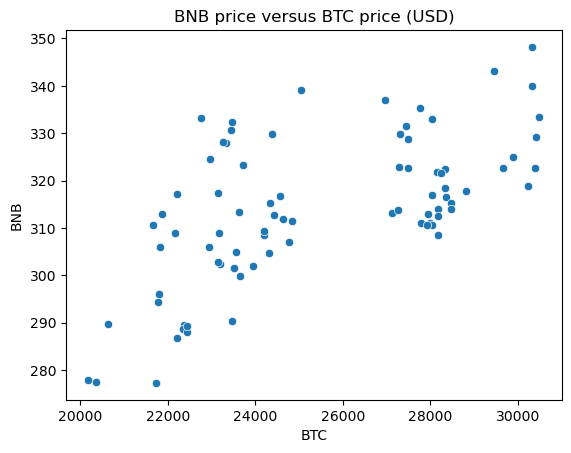

In [38]:
# create a scatterplot of the data
plt.figure()
sns.scatterplot(data=model_data, x='BTC_price', y='BNB_price')
plt.title('BNB price versus BTC price (USD)')
plt.xlabel('BTC')
plt.ylabel('BNB')
plt.show()

The data is nonlinear and difficult to model in this form without losing complex patterns in the lower and upper regions of the graph. Because of this, the data was augmented by adding the additional feature of 'timestep' to make a 3d projection and clarify the pattern.

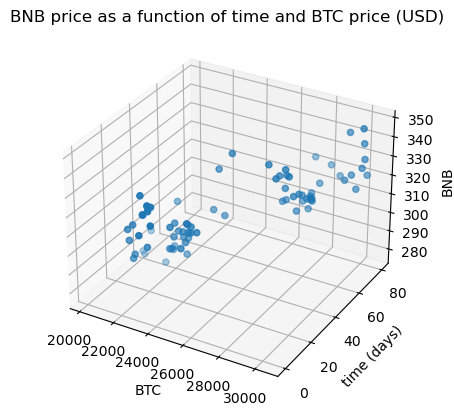

In [41]:
# create 3d plot
plot = plt.figure().add_subplot(projection='3d')
plot.scatter(model_data['BTC_price'], model_data['timestep'], model_data['BNB_price'])
plt.xlabel('BTC')
plt.ylabel('time (days)', rotation=90)
plot.set_zlabel('BNB', rotation=90)
plt.title('BNB price as a function of time and BTC price (USD)');

The 3d graph spreads the data out and is easier for the regression model to recognize patterns.

Next, the data was split the data into testing and training sections. This can also be done using the ```test_train_split``` function of ```sklearn``` but in this case it was done manually. 70% of the data was used for training and the remaining 30% for testing model performance.

In [28]:
# manually create training and testing data
training_percent = 0.7
X_train = model_data.loc[model_data.index <= model_data.index.max()*training_percent, ['BTC_price', 'timestep']]
X_test = model_data.loc[model_data.index >= model_data.index.max()*training_percent, ['BTC_price', 'timestep']]
y_train = model_data.loc[model_data.index <= model_data.index.max()*training_percent, ['BNB_price']]
y_test = model_data.loc[model_data.index >= model_data.index.max()*training_percent, ['BNB_price']]

Checking the shapes of the newly formed datasets.

In [29]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (57, 2), X_test: (25, 2), y_train: (57, 1), y_test: (25, 1)


For some regression models and datasets it is important to scale the data, but in this case the data did not need to be scaled.


### Training and predictions
Four data sets were created. ```X_train``` is the array of values of BTC for training and ```y_train``` is the array of BNB values for training. ```X_test``` and ```y_test``` are the remaining arrays that were not seen by the model during fitting and thus were used to evaluate the model's predictive performance. Manual hyperparameter tuning was used rather than ```GridSearchCV```.

The neural network was built with 10 hidden layers of 5 nodes in each layer. The 'lbfgs' solver was used instead of the default due to the small size of the dataset.

In [30]:
# initialize the model
model = MLPRegressor(random_state=1, max_iter=500, activation='relu', hidden_layer_sizes=(5,10), solver='lbfgs')


Training the model

In [31]:
# fitting
model.fit(X_train, y_train.values.reshape(y_train.size));

With the model trained, predictions were made and tests were performed to evaluate accuracy. Predictions were made using both the training data and the testing data to assist in hyperparameter tuning to minimize underfitting/overfitting the model.

In [32]:
# use model to make predictions
y_test_pred = model.predict(X_test).reshape(-1,1) # prediction based on test data
y_train_pred = model.predict(X_train).reshape(-1,1) # prediction based on training data


### Results   

#### Evaluating predictions

In [33]:
# display characteristics of the predicted values
print('The range of predicted values is', y_test_pred.max() - y_test_pred.min())
print('The max predicted value is', y_test_pred.max())

The range of predicted values is 27.488053561962772
The max predicted value is 332.7749481940495


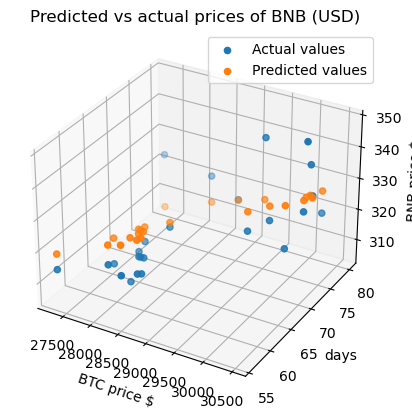

In [42]:
# plot prediction of testing data
plot = plt.figure().add_subplot(projection='3d')
plot.scatter(X_test['BTC_price'], X_test['timestep'], y_test['BNB_price'], label='Actual values')
plot.scatter(X_test['BTC_price'], X_test['timestep'], y_test_pred, label='Predicted values')
plt.title('Predicted vs actual prices of BNB (USD)')
plt.xlabel('BTC price $')
plt.ylabel('days')
plot.set_zlabel('BNB price $');
plt.legend();

The relationship is difficult to see with this inline view, so a lineplot was created. In order to evaluate the model's performance on both the training set and the testing set, plots were created of both. This was helpful to diagnose model overfitting.

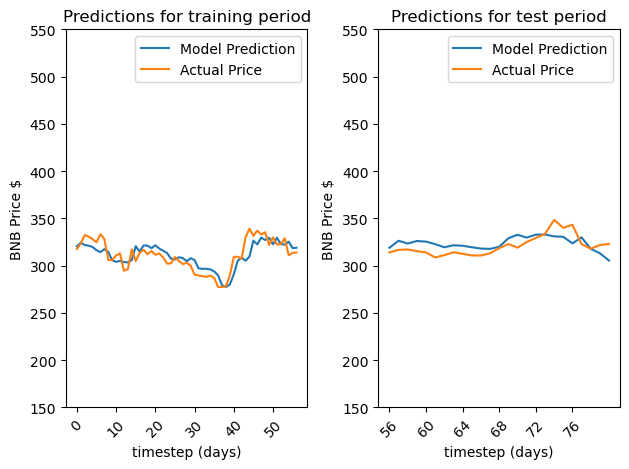

In [35]:
# create lineplot of predictions on training data
plt.subplot(1,2,1)
sns.lineplot(x=X_train['timestep'], y=y_train_pred.reshape(len(y_train_pred)), label='Model Prediction')
sns.lineplot(x=X_train['timestep'], y=y_train['BNB_price'], label='Actual Price')
plt.xlabel('timestep (days)')
plt.ylabel('BNB Price $')
plt.yticks(range(150,600, 50))
plt.title("Predictions for training period")
plt.xticks(range(X_train['timestep'].min(), X_train['timestep'].max(), 10))
plt.xticks(rotation=45)

# create lineplot of predictions on test data
plt.subplot(1,2,2)
sns.lineplot(x=X_test['timestep'], y=y_test_pred.reshape(len(y_test_pred)), label='Model Prediction')
sns.lineplot(x=X_test['timestep'], y=y_test['BNB_price'], label='Actual Price')
plt.title("Predictions for test period")
plt.xlabel('timestep (days)')
plt.ylabel("BNB Price $")
plt.xticks(range(X_test['timestep'].min(), X_test['timestep'].max(), 4))
plt.xticks(rotation=45)
plt.yticks(range(150,600, 50))
plt.tight_layout()

#### Accuracy score

In [36]:
# accuracy metrics
test_mape = mean_absolute_percentage_error(y_test['BNB_price'].values, y_test_pred)
train_mape = mean_absolute_percentage_error(y_train['BNB_price'].values, y_train_pred)

print(f'The mean absolute percent error on testing data is {test_mape}')
print(f'The mean absolute percent error on training data is {train_mape}')

The mean absolute percent error on testing data is 0.02637395839954838
The mean absolute percent error on training data is 0.025631861456590434


#### Interpreting the results of the machine learning model
The model predicted the closing price of BNB with an acceptable mean absolute percent error of around 0.026. It performed similarly on the training dataset as well which means it struck a good balance between underfitting/overfitting. This demonstrates that reasonably accurate forecasts may be made with regression models that take advantage of the correlations within the cryptocurrency market. 

 